# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Importing Dataset

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='tfDUSUJ0bQh2gvRxMRjfgQoA66L9uJHQxefwtKkMU-od',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'machinelearningbasedvehicleperfor-donotdelete-pr-0r63ohmicdap0x'
object_key = 'car_performance.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset= pd.read_csv(body)
dataset.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Finding missing data

In [3]:
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [4]:
dataset['horsepower']=dataset['horsepower'].replace('?',np.nan)

In [5]:
dataset['horsepower'].isnull().sum()

0

In [6]:
dataset['horsepower']=dataset['horsepower'].astype('float64')

In [7]:
dataset['horsepower'].fillna((dataset['horsepower'].mean()),inplace=True)

In [8]:
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [9]:
dataset.info() #Pandas dataframe.info() function is used to get a quick overview of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [10]:
dataset.describe() #Pandas describe() is used to view some basic statistical details of a data frame or a series of numeric values.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
##There is no use with car name attribute so drop it

In [12]:
dataset=dataset.drop('car name',axis=1) #dropping the unwanted column.

In [13]:
corr_table=dataset.corr()#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
corr_table

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.777501,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842437,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897082,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.777501,0.842437,0.897082,1.000000,0.863990,-0.686436,-0.417081,-0.452386
weight,-0.831741,0.896017,0.932824,0.863990,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686436,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.417081,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452386,-0.581024,0.205873,0.180662,1.000000


## Data Visualizations

In [14]:
##Heatmap : which represents correlation between attributes

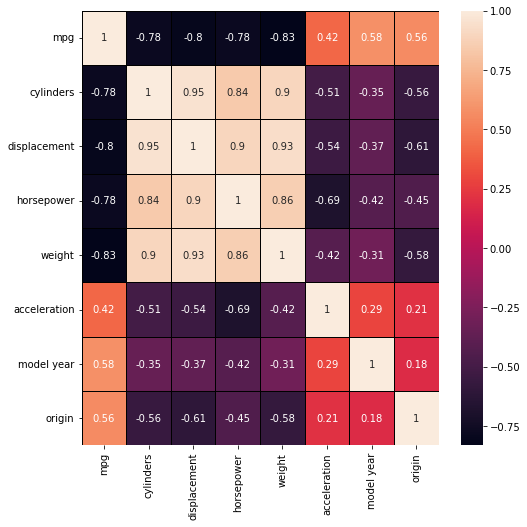

In [15]:
sns.heatmap(dataset.corr(),annot=True,linecolor ='black', linewidths = 1)#Heatmap is a way to show some sort of matrix plot,annot is used for correlation.
fig=plt.gcf()
fig.set_size_inches(8,8)

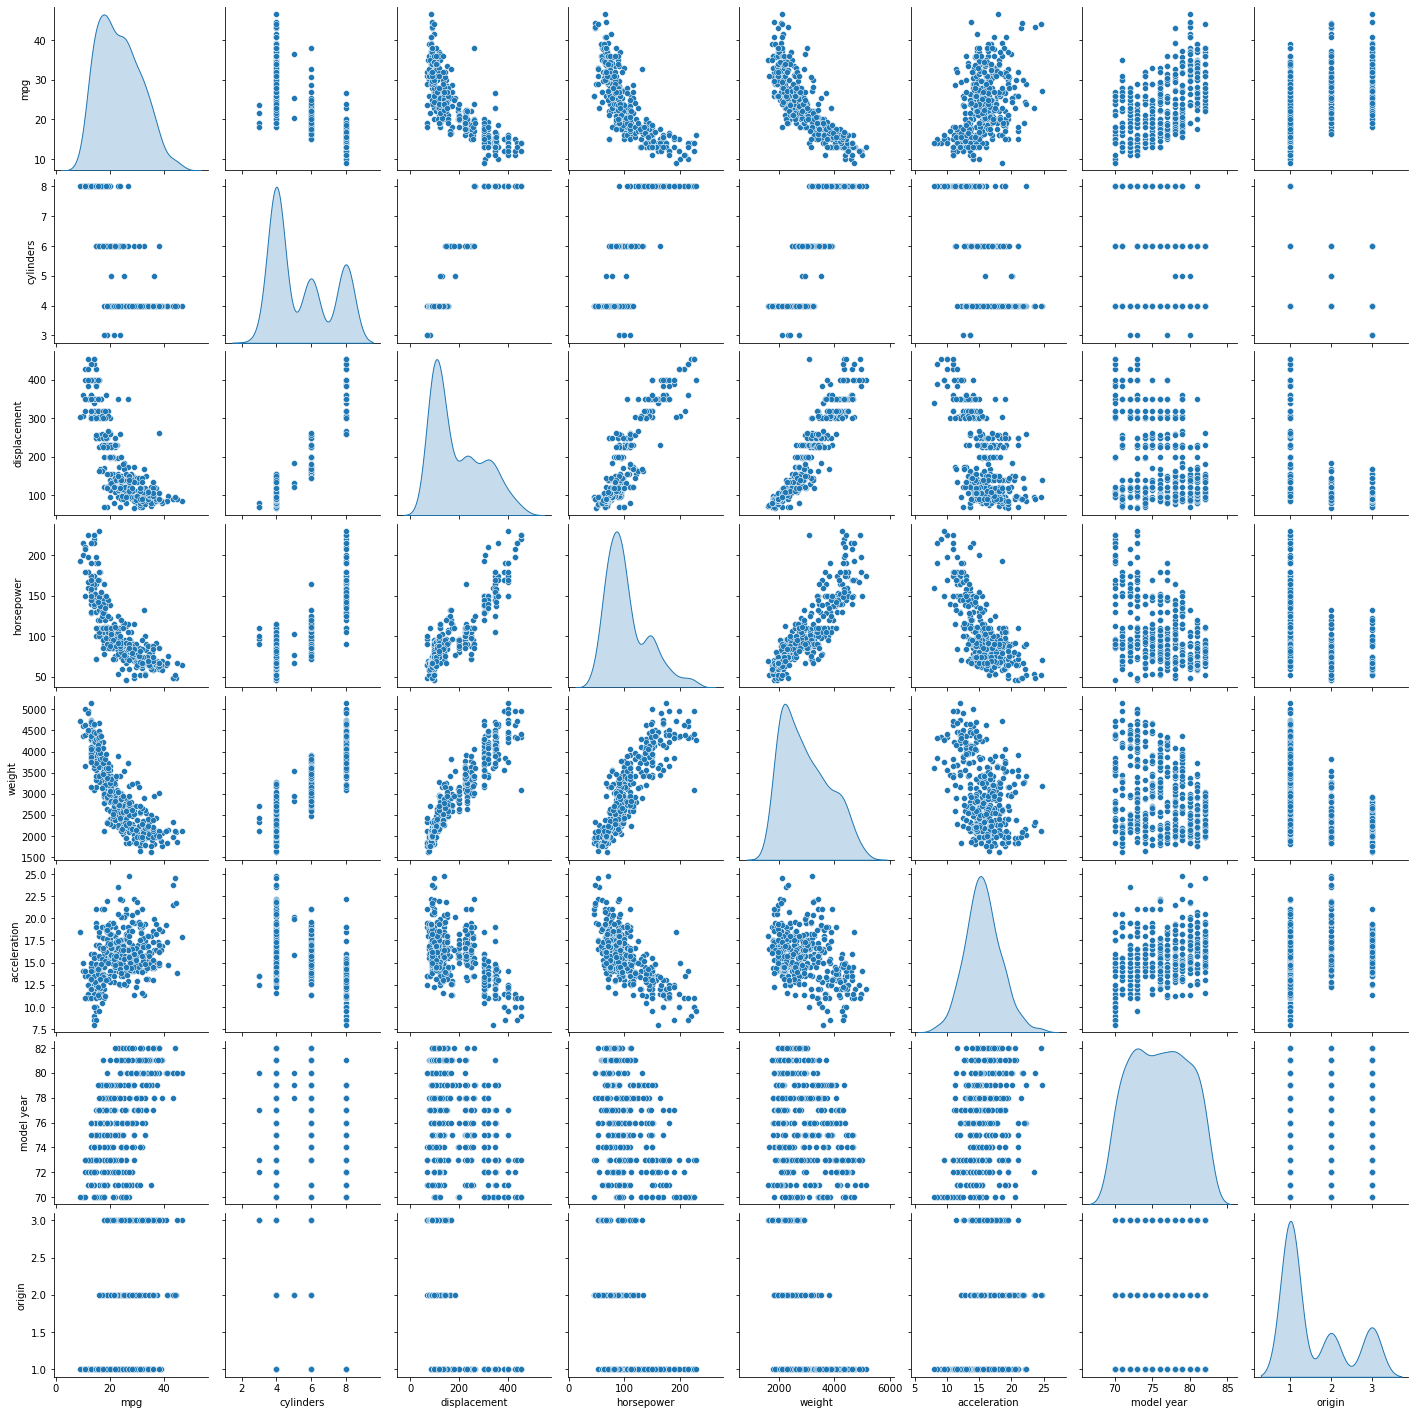

In [16]:
sns.pairplot(dataset,diag_kind='kde') #pairplot represents pairwise relation across the entire dataframe.
plt.show()

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

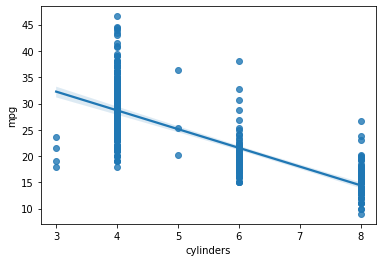

In [17]:
sns.regplot(x="cylinders", y="mpg", data=dataset)

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

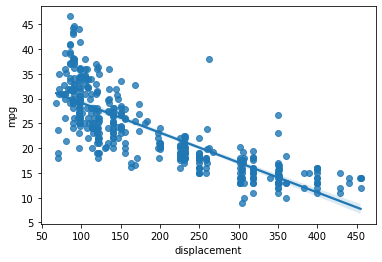

In [18]:
sns.regplot(x="displacement", y="mpg", data=dataset)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

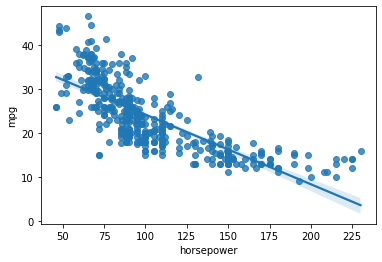

In [19]:
sns.regplot(x="horsepower", y="mpg", data=dataset)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

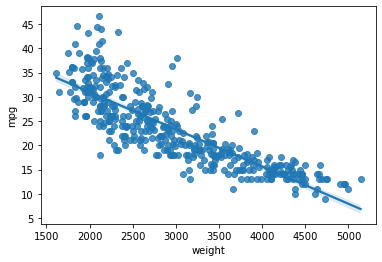

In [20]:
sns.regplot(x="weight", y="mpg", data=dataset)

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

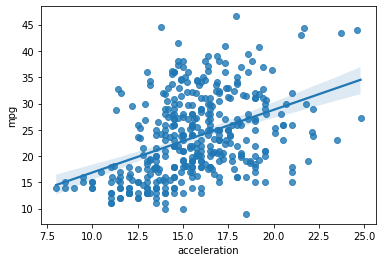

In [21]:
sns.regplot(x="acceleration", y="mpg", data=dataset)

<AxesSubplot:xlabel='model year', ylabel='mpg'>

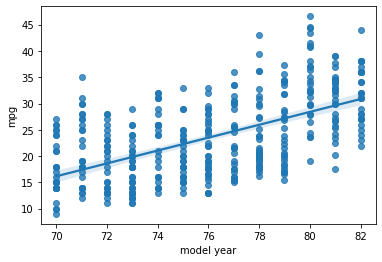

In [22]:
sns.regplot(x="model year", y="mpg", data=dataset)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

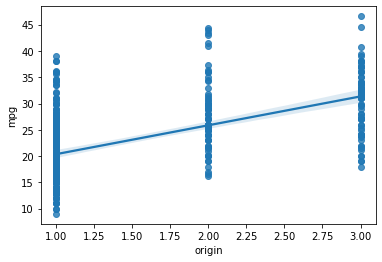

In [23]:
sns.regplot(x="origin", y="mpg", data=dataset)

<AxesSubplot:xlabel='mpg'>

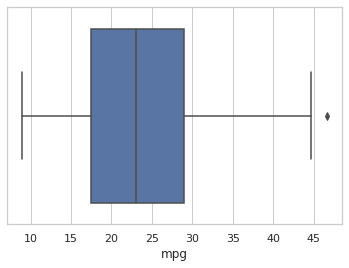

In [24]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset["mpg"])

#  The P-value is the probability value that the correlation between these two variables is statistically significant.

Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is  0.001: we say there is strong evidence that the correlation is significant.
the p-value is  0.05: there is moderate evidence that the correlation is significant.
the p-value is  0.1: there is weak evidence that the correlation is significant.
the p-value is  0.1: there is no evidence that the correlation is significant.

In [25]:
from scipy import stats

#### Cylinders vs mpg

In [26]:
pearson_coef, p_value = stats.pearsonr(dataset['cylinders'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7753962854205542  with a P-value of P = 4.503992246177055e-81


#### Displacement vs mpg

In [27]:
pearson_coef, p_value = stats.pearsonr(dataset['displacement'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.8042028248058978  with a P-value of P = 1.6558889101930157e-91


#### Horsepower vs mpg 

In [28]:
pearson_coef, p_value = stats.pearsonr(dataset['horsepower'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7775013636276671  with a P-value of P = 8.802190914914203e-82


#### Weight vs mpg

In [29]:
pearson_coef, p_value = stats.pearsonr(dataset['weight'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.831740933244335  with a P-value of P = 2.9727995640500577e-103


#### Acceleration vs mpg

In [30]:
pearson_coef, p_value = stats.pearsonr(dataset['acceleration'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.4202889121016507  with a P-value of P = 1.823091535078553e-18


#### Model year vs mpg

In [31]:
pearson_coef, p_value = stats.pearsonr(dataset['model year'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5792671330833096  with a P-value of P = 4.844935813365483e-37


#### Origin vs mpg

In [32]:
pearson_coef, p_value = stats.pearsonr(dataset['origin'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5634503597738431  with a P-value of P = 1.0114822102336483e-34


#### Ordinary Least Squares Statistics

In [33]:
test=smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+origin',dataset).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     167.6
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          8.18e-105
Time:                        14:56:22   Log-Likelihood:                -1129.2
No. Observations:                 398   AIC:                             2272.
Df Residuals:                     391   BIC:                             2300.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       43.4941      2.690     16.171      0.000      38.206      48.782
cylinders       -0.5537      0.402     -1.377      0.169      -1.344       0.237
displacement     0.0125      0.009      1.335      0.183      -0.006       0.031
horsepower      -0.0628      0.017     -3.797      0.000      -0.095      -0.030
weight          -0.0049      0.001     -6.168      0.000      -0.006      -0.003
acceleration    -0.0402      0.121     -0.332      0.740      -0.278       0.198
origin           1.4880      0.345      4.315      0.000       0.810       2.166
==============================================================================
Omnibus:                       31.632   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.557
Skew:                           0.613   Prob(JB):                     9.46e-10
Kurtosis:                       4.002   Cond. No.                     4.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Seperating into Dependent and Independent variables

#### Independent variables

In [34]:
x=dataset[['cylinders','displacement','horsepower','weight','model year','origin']].values
x

array([[8.000e+00, 3.070e+02, 1.300e+02, 3.504e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.500e+02, 1.650e+02, 3.693e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.180e+02, 1.500e+02, 3.436e+03, 7.000e+01, 1.000e+00],
       ...,
       [4.000e+00, 1.350e+02, 8.400e+01, 2.295e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.200e+02, 7.900e+01, 2.625e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.190e+02, 8.200e+01, 2.720e+03, 8.200e+01, 1.000e+00]])

#### Dependent variables

In [35]:
y=dataset.iloc[:,0:1].values
y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17

# Splitting into train and test data.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

## decision tree regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0,criterion="absolute_error")
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', random_state=0)

In [39]:
DecisionTreeRegressor(criterion='absolute_error', random_state=0)

DecisionTreeRegressor(criterion='absolute_error', random_state=0)

In [40]:
import pickle
pickle.dump(dt,open('decision_model.pkl','wb'))

In [41]:
y_pred=dt.predict(x_test)
y_pred

array([13. , 26.5, 16. , 19. , 19. , 31. , 37. , 22. , 17. , 26.8, 39. ,
       31.8, 16. , 26. , 15.5, 34.3, 27. , 27. , 16.5, 31.5, 16. , 23. ,
       23. , 19. , 34.2, 24.2, 36.1, 36. , 34.3, 18.5, 19.2, 23.7, 15. ,
       32. , 25. , 23. , 22.5, 16. , 31.5, 12. ])

In [42]:
y_test

array([[14. ],
       [25. ],
       [13. ],
       [21. ],
       [18. ],
       [35. ],
       [34.1],
       [20. ],
       [15. ],
       [23.5],
       [40.9],
       [37.2],
       [18. ],
       [23. ],
       [15.5],
       [35.7],
       [31. ],
       [27. ],
       [18. ],
       [37.3],
       [15.5],
       [23. ],
       [24. ],
       [18. ],
       [34.5],
       [25.4],
       [36.1],
       [34. ],
       [30. ],
       [16. ],
       [18.6],
       [37. ],
       [15. ],
       [33.5],
       [22.4],
       [24. ],
       [19. ],
       [16.9],
       [31.9],
       [12. ]])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


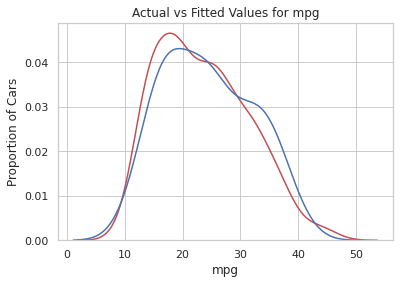

In [43]:
ax1 = sns.distplot(dataset['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')
 
plt.show()
plt.close()

In [44]:
from sklearn.metrics import r2_score,mean_squared_error

In [45]:
r2_score(y_test,y_pred)

0.8577931296398441

In [46]:
mean_squared_error(y_test,y_pred)

9.829249999999998

In [47]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.1351634726119144

# random forest regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf= RandomForestRegressor(n_estimators=10,random_state=0,criterion='absolute_error')
rf.fit(x_train,y_train)

/tmp/wsuser/ipykernel_566/106078915.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor(criterion='absolute_error', n_estimators=10,
                      random_state=0)

In [50]:
y_pred2=rf.predict(x_test)
y_pred2

array([14.25, 26.3 , 13.4 , 22.1 , 18.3 , 30.9 , 34.41, 24.85, 15.4 ,
       25.29, 37.36, 38.61, 17.7 , 24.5 , 16.2 , 31.42, 29.07, 27.32,
       16.82, 32.47, 16.05, 25.5 , 24.15, 20.2 , 32.4 , 25.58, 32.63,
       31.97, 30.25, 16.37, 18.6 , 29.56, 17.97, 31.1 , 21.41, 24.15,
       19.9 , 16.3 , 33.17, 11.9 ])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


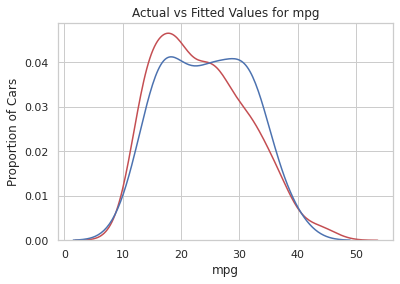

In [51]:
ax1 = sns.distplot(dataset['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [52]:
from sklearn.metrics import r2_score,mean_squared_error

In [53]:
r2_score(y_test,y_pred2)

0.921450931811811

In [54]:
mean_squared_error(y_test,y_pred2)

5.429262500000002

In [55]:
np.sqrt(mean_squared_error(y_test,y_pred2))

2.330077788401066

## linear regression

In [56]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred3=mr.predict(x_test)
y_pred3

array([[13.2162321 ],
       [24.27285307],
       [11.61772023],
       [20.96641686],
       [17.7358037 ],
       [29.45346926],
       [33.47436298],
       [23.17018367],
       [15.07249948],
       [26.7641345 ],
       [33.42858873],
       [33.93286841],
       [21.50648727],
       [25.81726693],
       [16.3148492 ],
       [30.58507574],
       [28.32755483],
       [28.65569292],
       [17.66424885],
       [31.01488248],
       [15.53264908],
       [24.60373733],
       [26.90214044],
       [20.49512288],
       [29.63732336],
       [28.47040955],
       [30.97812573],
       [29.93363565],
       [29.87143269],
       [18.08117895],
       [20.35120121],
       [31.31836429],
       [20.99073903],
       [32.03819055],
       [23.85718455],
       [26.30866396],
       [21.38233768],
       [16.80219962],
       [32.13262515],
       [ 9.27349071]])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


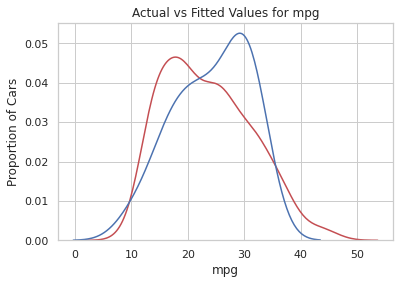

In [58]:
ax1 = sns.distplot(dataset['mpg'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [59]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred3)

0.8519031381502012

In [60]:
mean_squared_error(y_test,y_pred3)

10.236362530519433

In [61]:
np.sqrt(mean_squared_error(y_test,y_pred3))

3.1994315949117325

#### Conclusion:

In [62]:
!pip install -U ibm-watson-machine-learning

In [63]:
from ibm_watson_machine_learning import APIClient

In [64]:
wml_credentials = {
    "apikey":"DJ-qq-RyTIQ1elVLq32920_ooU33DUuoK3JXCpvU0ZIN",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [65]:
wml_client=APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------------  ------------------------
ID                                    NAME                CREATED
68968f19-cad8-4121-bd2d-e8c5c5805ee2  vehicle deployment  2022-11-17T09:40:52.864Z
------------------------------------  ------------------  ------------------------


In [66]:
space_id="68968f19-cad8-4121-bd2d-e8c5c5805ee2"

In [67]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [68]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [69]:
model_name="analysis_model"
deployment_name="vehicle deployment"
model_deploy=dt

In [70]:
software_spec_uid=wml_client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")

In [71]:
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [72]:
model_props={
    wml_client.repository.ModelMetaNames.NAME:model_name,
    wml_client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [73]:
model_details=wml_client.repository.store_model(
    model=model_deploy,
    meta_props=model_props,
    training_data=x_train,
    training_target=y_train)

In [74]:
x_train[0]

array([8.000e+00, 4.540e+02, 2.200e+02, 4.354e+03, 7.000e+01, 1.000e+00])

In [75]:
dt.predict([[8.000e+00, 4.540e+02, 2.200e+02, 4.354e+03, 7.000e+01, 1.000e+00]])

array([14.])

In [76]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l0',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-18T14:56:31.233Z',
  'id': '63085881-9251-4ef6-8b5a-b229fe580be1',
  'modified_at': '2022-11-18T14:56:33.247Z',
  'name': 'analysis_model',
  'owner': 'IBMid-6630041B2B',
  'resource_key': '868e7ae6-4ec6-46da-ac97-b63c67bdfd0d',
  'space_id': '68968f19-cad8-4121-bd2d-e8c5c5805ee2'},
 'system': {'warnings': []}}

In [77]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'63085881-9251-4ef6-8b5a-b229fe580be1'

In [85]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:deployment_name, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [86]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '63085881-9251-4ef6-8b5a-b229fe580be1' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.
.
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='1420dbfd-d066-423b-9066-7c8d91f42db2'
------------------------------------------------------------------------------------------------


